In [2]:
#a project off codecademy on logistic regression, finding ROC curves
# from UCI data archive https://archive.ics.uci.edu/dataset/20/census+income
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

#import codecademylib3
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo 

In [3]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Sep 09 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [4]:
y = y.income.str.replace('.','')

In [5]:
df = X.join(y)

In [31]:


#Clean columns by stripping extra whitespace for columns of type "object"
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()
print(df.head())

#1. Check Class Imbalance
print(df.income.value_counts())

#2. Create feature dataframe X with feature columns and dummy variables for categorical features
feature_cols = ['age','capital-gain', 'capital-loss', 'hours-per-week', 'sex','race', 'education']

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

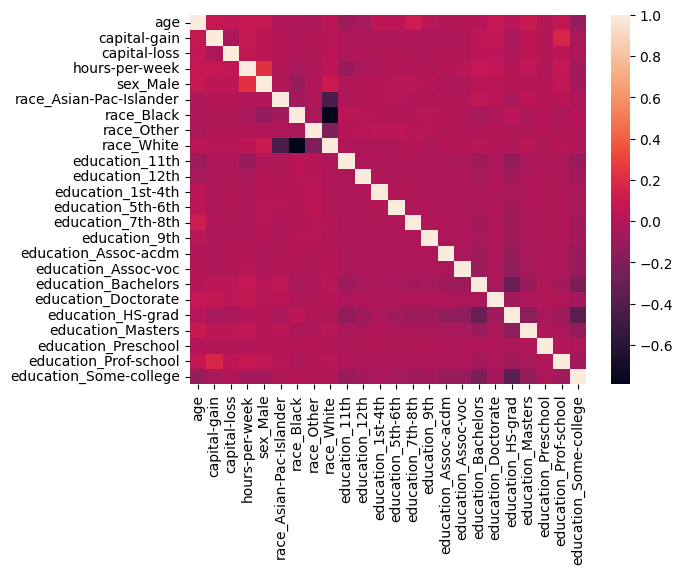

Model Parameters, Intercept:
[-5.72861659]
Model Parameters, Coeff:
[[ 3.68087102e-02  3.35906554e-04  6.34429738e-04  3.09976138e-02
   1.10171569e+00  0.00000000e+00 -3.76021855e-01  0.00000000e+00
   1.03800670e-01 -6.16601747e-01  0.00000000e+00 -3.33198758e-01
  -5.22013196e-01 -9.03357740e-01 -7.01396380e-01  7.38216267e-01
   6.74307945e-01  1.39084149e+00  1.95261743e+00  6.20990431e-02
   1.72004788e+00  0.00000000e+00  1.93714133e+00  4.75427472e-01]]


<Figure size 640x480 with 0 Axes>

In [33]:
X = pd.get_dummies(df[feature_cols], drop_first=True)
#3. Create a heatmap of X data to see feature correlation
sns.heatmap(X.corr())
plt.show()
plt.clf()

#4. Create output variable y which is binary, 0 when income is less than 50k, 1 when it is greater than 50k
y = np.where(df['income']=='<=50K', 0, 1)

#5a. Split data into a train and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

#5b. Fit LR model with sklearn on train set, and predicting on the test set
log_reg = LogisticRegression(C=0.05, penalty='l1', solver='liblinear')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

#6. Print model parameters (intercept and coefficients)
print('Model Parameters, Intercept:')
print(log_reg.intercept_)

print('Model Parameters, Coeff:')
print(log_reg.coef_)

Confusion Matrix on test set: [[7055  375]
 [1357  982]]
Accuracy Score on test set: 0.8227044733340158
                      vars      coef
13       education_7th-8th -0.903358
14           education_9th -0.701396
9           education_11th -0.616602
12       education_5th-6th -0.522013
6               race_Black -0.376022
11       education_1st-4th -0.333199
1             capital-gain  0.000336
2             capital-loss  0.000634
3           hours-per-week  0.030998
0                      age  0.036809
19       education_HS-grad  0.062099
8               race_White  0.103801
23  education_Some-college  0.475427
16     education_Assoc-voc  0.674308
15    education_Assoc-acdm  0.738216
4                 sex_Male  1.101716
17     education_Bachelors  1.390841
20       education_Masters  1.720048
22   education_Prof-school  1.937141
18     education_Doctorate  1.952617


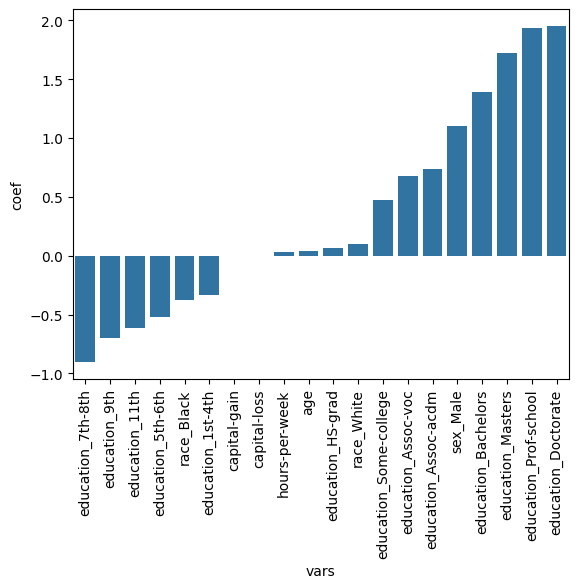

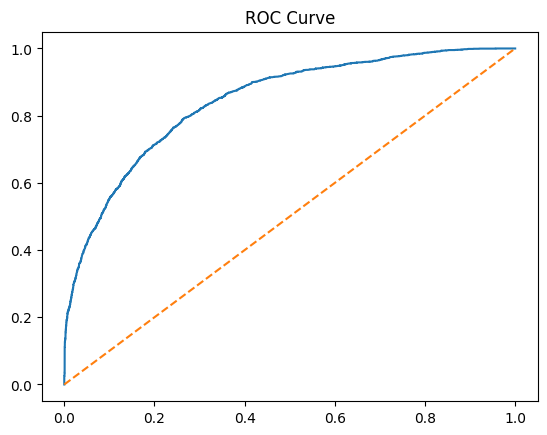

<Figure size 640x480 with 0 Axes>

In [34]:
#7. Evaluate the predictions of the model on the test set. Print the confusion matrix and accuracy score.
print('Confusion Matrix on test set:', confusion_matrix(y_test, y_pred))
print('Accuracy Score on test set:', log_reg.score(x_test, y_test))

# 8.Create new DataFrame of the model coefficients and variable names; sort values based on coefficient
coef_df = pd.DataFrame(zip(X.columns, log_reg.coef_[0]), columns=['vars', 'coef']).sort_values('coef')
coef_df = coef_df[coef_df['coef'].abs()>0].sort_values('coef')
print(coef_df)
#9. barplot of the coefficients sorted in ascending order
sns.barplot(x = coef_df.vars, y = coef_df.coef)
plt.xticks(rotation=90)
plt.show()
plt.clf()
#10. Plot the ROC curve and print the AUC value.
y_pred_prob = log_reg.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:,1])

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle='--')
plt.title('ROC Curve')
plt.show()
plt.clf()


In [49]:
import xgboost as xgb

dtrain = xgb.DMatrix(x_train, y_train, enable_categorical=True)
dtest = xgb.DMatrix(x_test, y_test, enable_categorical=True)

params = {"objective": "binary:logistic", "tree_method": "hist", "device":"cuda"}
n=100
model = xgb.XGBClassifier().fit(x_train, y_train)

In [52]:
from sklearn.metrics import mean_squared_error
preds = model.predict(x_test)


print(confusion_matrix(y_test, preds))

[[7068  362]
 [1077 1262]]


In [53]:
print(accuracy_score(y_test, preds))

0.8526973078104207


In [55]:
# cross-validating the model
# output shows the error or percent of the time that the model predicted incorrectly
xgb.cv(params, 
       dtrain, 
       num_boost_round=10, 
       nfold=5, 
       metrics={"error"}, 
       seed=0, 
       callbacks=[xgb.callback.EvaluationMonitor(show_stdv=True)])

[0]	train-error:0.18235+0.00040	test-error:0.18238+0.00169
[1]	train-error:0.17960+0.00040	test-error:0.18023+0.00151
[2]	train-error:0.17700+0.00096	test-error:0.17769+0.00194
[3]	train-error:0.17005+0.00279	test-error:0.17158+0.00234
[4]	train-error:0.16334+0.00360	test-error:0.16584+0.00366
[5]	train-error:0.16028+0.00095	test-error:0.16259+0.00245
[6]	train-error:0.15836+0.00120	test-error:0.16113+0.00241
[7]	train-error:0.15719+0.00183	test-error:0.16047+0.00180
[8]	train-error:0.15630+0.00223	test-error:0.15998+0.00229
[9]	train-error:0.15539+0.00228	test-error:0.15881+0.00238


,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.182351,0.000400,0.182376,0.001688
1,0.179600,0.000403,0.180227,0.001510
2,0.176996,0.000965,0.177693,0.001937
3,0.170047,0.002787,0.171576,0.002338
4,0.163342,0.003599,0.165843,0.003664
5,0.160277,0.000947,0.162593,0.002447
6,0.158364,0.001205,0.161134,0.002411
7,0.157187,0.001831,0.160469,0.001802
8,0.156304,0.002229,0.159982,0.002292
9,0.155389,0.002281,0.158805,0.002384


In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, X, y, cv=5)
scores.mean()

np.float64(0.822345545323844)